<a href="https://colab.research.google.com/github/shubhika1723/shubhika_INFO5731_Spring2020/blob/main/In_class_exercise_05_11172022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 11/17/2022)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [10]:
# Write your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import KFold

#load txt data 
test_data = pd.read_csv(r'stsa-test.csv', sep='\t', header=None)
train_data = pd.read_csv(r'stsa-test.csv', sep='\t', header=None)


def describe_data(data):
    print(data.head())
    print(data.info())
    print(data.describe())
    print(data.shape)
    print(data.dtypes)
    print(data.isnull().sum())
    print(data.isnull().sum().sum())

describe_data(train_data)
describe_data(test_data)

#clean data
def clean_data(data):
    data.columns = ['label', 'text']
    data['text'] = data['text'].apply(lambda x: x.lower())
    data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]', '', x)))
    data['text'] = data['text'].apply((lambda x: re.sub('\s+', ' ', x)))
    return data

#plot
def plot(data):
    sns.countplot(x='label', data=data)
    plt.show()


def split_data(data):
    train, validate = train_test_split(data, test_size=0.2, random_state=0)
    return train, validate

def algorithms(train, validate):
    #MultinominalNB
    mnb = MultinomialNB()
    mnb.fit(train['text'], train['label'])
    mnb_pred = mnb.predict(validate['text'])
    mnb_accuracy = accuracy_score(validate['label'], mnb_pred)
    mnb_recall = recall_score(validate['label'], mnb_pred)
    mnb_precision = precision_score(validate['label'], mnb_pred)
    mnb_f1 = f1_score(validate['label'], mnb_pred)
    print('MultinominalNB')
    print('Accuracy:', mnb_accuracy)
    print('Recall:', mnb_recall)
    print('Precision:', mnb_precision)
    print('F1 score:', mnb_f1)
    print('\n')
    
    #SVM
    svc = SVC()
    svc.fit(train['text'], train['label'])
    svc_pred = svc.predict(validate['text'])
    svc_accuracy = accuracy_score(validate['label'], svc_pred)
    svc_recall = recall_score(validate['label'], svc_pred)
    svc_precision = precision_score(validate['label'], svc_pred)
    svc_f1 = f1_score(validate['label'], svc_pred)
    print('SVM')
    print('Accuracy:', svc_accuracy)
    print('Recall:', svc_recall)
    print('Precision:', svc_precision)
    print('F1 score:', svc_f1)
    print('\n')

    #KNN
    knn = KNeighborsClassifier()
    knn.fit(train['text'], train['label'])
    knn_pred = knn.predict(validate['text'])
    knn_accuracy = accuracy_score(validate['label'], knn_pred)
    knn_recall = recall_score(validate['label'], knn_pred)
    knn_precision = precision_score(validate['label'], knn_pred)
    knn_f1 = f1_score(validate['label'], knn_pred)
    print('KNN')
    print('Accuracy:', knn_accuracy)
    print('Recall:', knn_recall)
    print('Precision:', knn_precision)
    print('F1 score:', knn_f1)
    print('\n')

    #Decision tree
    dt = DecisionTreeClassifier()
    dt.fit(train['text'], train['label'])
    dt_pred = dt.predict(validate['text'])
    dt_accuracy = accuracy_score(validate['label'], dt_pred)
    dt_recall = recall_score(validate['label'], dt_pred)
    dt_precision = precision_score(validate['label'], dt_pred)
    dt_f1 = f1_score(validate['label'], dt_pred)
    print('Decision tree')
    print('Accuracy:', dt_accuracy)
    print('Recall:', dt_recall)
    print('Precision:', dt_precision)
    print('F1 score:', dt_f1)
    print('\n')

    #Random Forest
    rf = RandomForestClassifier()
    rf.fit(train['text'], train['label'])
    rf_pred = rf.predict(validate['text'])
    rf_accuracy = accuracy_score(validate['label'], rf_pred)
    rf_recall = recall_score(validate['label'], rf_pred)
    rf_precision = precision_score(validate['label'], rf_pred)
    rf_f1 = f1_score(validate['label'], rf_pred)
    print('Random Forest')
    print('Accuracy:', rf_accuracy)
    print('Recall:', rf_recall)
    print('Precision:', rf_precision)
    print('F1 score:', rf_f1)
    print('\n')
    
    #XGBoost
    xgb = XGBClassifier()
    xgb.fit(train['text'], train['label'])
    xgb_pred = xgb.predict(validate['text'])
    xgb_accuracy = accuracy_score(validate['label'], xgb_pred)
    xgb_recall = recall_score(validate['label'], xgb_pred)
    xgb_precision = precision_score(validate['label'], xgb_pred)
    xgb_f1 = f1_score(validate['label'], xgb_pred)
    print('XGBoost')
    print('Accuracy:', xgb_accuracy)
    print('Recall:', xgb_recall)
    print('Precision:', xgb_precision)
    print('F1 score:', xgb_f1)
    print('\n')

    
def run():
    output = algorithms(split_data(train_data)[0], split_data(test_data)[0])
    return output

                                                   0
0   0 no movement , no yuks , not much of anything .
1  0 a gob of drivel so sickly sweet , even the e...
2  0 gangs of new york is an unapologetic mess , ...
3  0 we never really feel involved with the story...
4          1 this is one of polanski 's best films .
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1821 non-null   object
dtypes: object(1)
memory usage: 14.4+ KB
None
                                                       0
count                                               1821
unique                                              1821
top     0 no movement , no yuks , not much of anything .
freq                                                   1
(1821, 1)
0    object
dtype: object
0    0
dtype: int64
0
                                                   0
0   0 no movement , no yuk

(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

            Price      Rating  Review Votes
count  233.000000  233.000000    233.000000
mean   168.919657    3.862661      1.579399
std    103.800554    1.461584      3.803799
min     59.990000    1.000000      0.000000
25%     69.990000    3.000000      0.000000
50%    199.990000    5.000000      0.000000
75%    299.000000    5.000000      1.000000
max    299.000000    5.000000     23.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  233 non-null    object 
 1   Brand Name    225 non-null    object 
 2   Price         233 non-null    float64
 3   Rating        233 non-null    int64  
 4   Reviews       233 non-null    object 
 5   Review Votes  233 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 11.0+ KB
None


                                        Product Name Brand Name   Price  \
0  "CLEAR

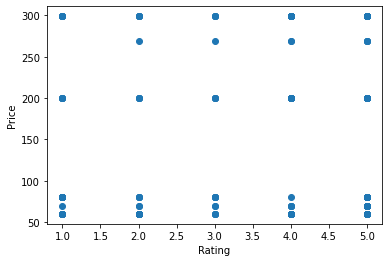

In [13]:
#Write your code here.
#load ml libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Load data
data = pd.read_csv(r'Amazonreviewsset.csv')

def split_data(data):
    #split data
    train, validate = train_test_split(data, test_size=0.2, random_state=42)
    return train, validate

def descriptive_analysis(data):
    #descriptive analysis
    print(data.describe())
    print('\n')
    print(data.info())
    print('\n')
    print(data.head())
    print('\n')
    print(data.columns)
    print('\n')
    print(data.shape)
    print('\n')
    print(data.dtypes)
    print('\n')
    print(data.isnull().sum())
    print('\n')
    print(data.isnull().sum().sum())
    print('\n')
descriptive_analysis(data)
plt.scatter(data['Rating'], data['Price'])
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()

def data_plotting(data):
    #data plotting
    sns.set(style="whitegrid")
    sns.set(font_scale=1.5)
    sns.countplot(x="label", data=data)
    plt.show()

    sns.set(style="whitegrid")


def clustering_methods(train, validate):
    #clustering methods
    from sklearn.cluster import KMeans
    from sklearn.cluster import DBSCAN
    #Hierarchical clustering
    from scipy.cluster.hierarchy import linkage, dendrogram
    from scipy.cluster.hierarchy import fcluster

    #K means
    kmeans = KMeans(n_clusters=3, random_state=0).fit(train['Price'])
    kmeans_pred = kmeans.predict(validate['Price'])
    kmeans_accuracy = accuracy_score(validate['label'], kmeans_pred)
    kmeans_recall = recall_score(validate['label'], kmeans_pred)
    kmeans_precision = precision_score(validate['label'], kmeans_pred)
    kmeans_f1 = f1_score(validate['label'], kmeans_pred)
    print('K means')
    print('Accuracy:', kmeans_accuracy)
    print('Recall:', kmeans_recall)
    print('Precision:', kmeans_precision)
    print('F1 score:', kmeans_f1)
    print('\n')

     #DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5).fit(train['Price'])
    dbscan_pred = dbscan.predict(validate['Price'])
    dbscan_accuracy = accuracy_score(validate['label'], dbscan_pred)
    dbscan_recall = recall_score(validate['label'], dbscan_pred)
    dbscan_precision = precision_score(validate['label'], dbscan_pred)
    dbscan_f1 = f1_score(validate['label'], dbscan_pred)
    print('DBSCAN')
    print('Accuracy:', dbscan_accuracy)
    print('Recall:', dbscan_recall)
    print('Precision:', dbscan_precision)
    print('F1 score:', dbscan_f1)
    print('\n')

    #Hierarchical clustering
    Z = linkage(train['Price'], 'ward')
    plt.figure(figsize=(25, 10))
    dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=train['label'])
    plt.show()

def run():
    output = clustering_methods(split_data(train_data)[0], split_data(test_data)[0])
    return output




In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

Finding clusters in data is done using a sort of unsupervised learning method called K means.
Similarly to other unsupervised learning algorithms, DBSCAN seeks out clusters that are not necessarily connected. A supervised learning approach called hierarchical clustering is used to build a hierarchical tree of groups. Clusters are the groupings at the bottom of the tree, and superclusters are the groups above them.
Members of each category in the hierarchy are similar to one another.
A similarity matrix—a group of values that gauges how similar two objects are to one another—determines this similarity. Finding groups that are similar to one another sometimes involves the use of hierarchical clustering. In order to better comprehend the structure of the data, it is also utilized to establish a hierarchy of groupings. Hierarchical clustering, DBSCAN, and K means are examples of unsupervised learning methods. To detect clusters in the data, they all employ data.